In [1]:
import pandas as pd

# Load the Excel file
file_path = 'C:/Users/ahmad/Desktop/global-superstore-bi-project/data/raw/global_superstore_raw.csv'
df = pd.read_csv(file_path)

# Display shape and first 5 rows
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (51290, 27)


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [2]:
# Overview of columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [3]:
# Check for missing values
df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [4]:
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [5]:
# Rename columns for easier handling
df.rename(columns={
    'Category': 'category',
    'City': 'city',
    'Country': 'country',
    'Customer.ID': 'customer_id',
    'Customer.Name': 'customer_name',
    'Discount': 'discount',
    'Market': 'market',
    '记录数': 'record_count',
    'Order.Date': 'order_date',
    'Order.ID': 'order_id',
    'Order.Priority': 'order_priority',
    'Product.ID': 'product_id',
    'Product.Name': 'product_name',
    'Profit': 'profit',
    'Quantity': 'quantity',
    'Region': 'region',
    'Row.ID': 'row_id',
    'Sales': 'sales',
    'Segment': 'segment',
    'Ship.Date': 'ship_date',
    'Ship.Mode': 'ship_mode',
    'Shipping.Cost': 'shipping_cost',
    'State': 'state',
    'Sub.Category': 'sub_category',
    'Year': 'year',
    'Market2': 'market_2',
    'weeknum': 'week_number'
}, inplace=True)


In [6]:
df.columns

Index(['category', 'city', 'country', 'customer_id', 'customer_name',
       'discount', 'market', 'record_count', 'order_date', 'order_id',
       'order_priority', 'product_id', 'product_name', 'profit', 'quantity',
       'region', 'row_id', 'sales', 'segment', 'ship_date', 'ship_mode',
       'shipping_cost', 'state', 'sub_category', 'year', 'market_2',
       'week_number'],
      dtype='object')

In [7]:
# Convert 'order_date' and 'ship_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

# Create new feature: days between order and shipping
df['order_to_ship_days'] = (df['ship_date'] - df['order_date']).dt.days

# Create new feature: profit margin (profit as % of sales)
df['profit_margin'] = (df['profit'] / df['sales']).round(2)

# View the new columns
df[['order_date', 'ship_date', 'order_to_ship_days', 'profit_margin']].head()


,order_date,ship_date,order_to_ship_days,profit_margin
0,2011-01-07,2011-01-09,2,0.49
1,2011-01-21,2011-01-26,5,0.49
2,2011-08-05,2011-08-09,4,0.47
3,2011-08-05,2011-08-09,4,0.48
4,2011-09-29,2011-10-03,4,0.52


In [8]:
# Count missing values in each column
df.isnull().sum().sort_values(ascending=False)


category              0
region                0
order_to_ship_days    0
week_number           0
market_2              0
year                  0
sub_category          0
state                 0
shipping_cost         0
ship_mode             0
ship_date             0
segment               0
sales                 0
row_id                0
quantity              0
city                  0
profit                0
product_name          0
product_id            0
order_priority        0
order_id              0
order_date            0
record_count          0
market                0
discount              0
customer_name         0
customer_id           0
country               0
profit_margin         0
dtype: int64

In [9]:
# Drop rows with missing key fields
df.dropna(subset=['order_date', 'ship_date', 'sales', 'profit'], inplace=True)

In [10]:
# Save the cleaned data
df.to_csv('C:/Users/ahmad/Desktop/global-superstore-bi-project/data/cleaned/global_superstore_cleaned.csv', index=False)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional styling
sns.set(style='whitegrid')

In [46]:
df['sales'].describe()
df['profit'].describe()

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: profit, dtype: float64

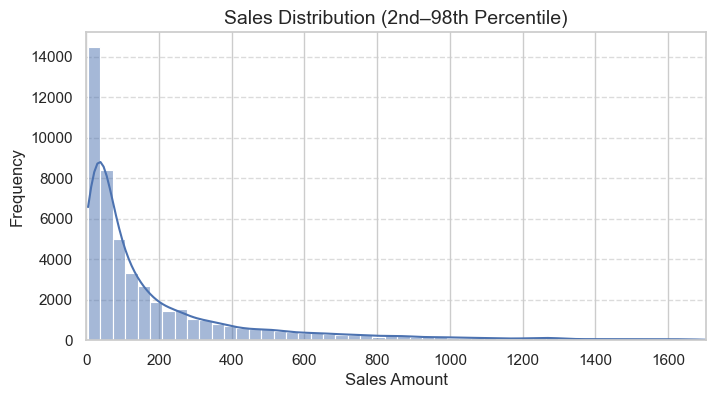

In [56]:
# Filter sales within 2nd to 98th percentile
low_sales, high_sales = df['sales'].quantile(0.02), df['sales'].quantile(0.98)
filtered_sales = df[(df['sales'] >= low_sales) & (df['sales'] <= high_sales)]

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(filtered_sales['sales'], bins=50, kde=True)
plt.title('Sales Distribution (2nd–98th Percentile)', fontsize=14)
plt.xlabel('Sales Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, high_sales)  # Auto limit up to 98th percentile
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


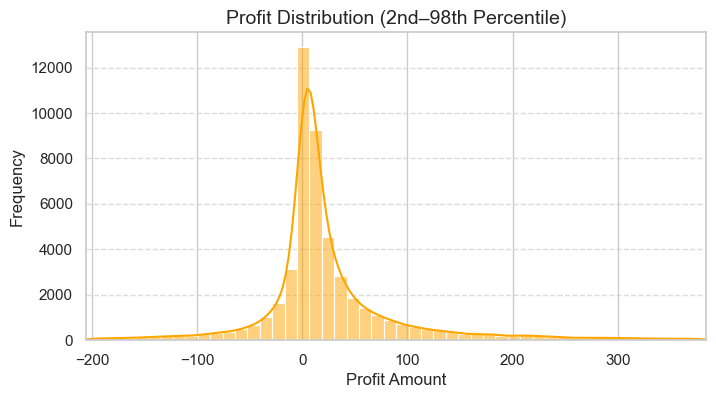

In [58]:
# Filter profit within 2nd to 98th percentile
low_profit, high_profit = df['profit'].quantile(0.02), df['profit'].quantile(0.98)
filtered_profit = df[(df['profit'] >= low_profit) & (df['profit'] <= high_profit)]

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(filtered_profit['profit'], bins=50, kde=True, color='orange')
plt.title('Profit Distribution (2nd–98th Percentile)', fontsize=14)
plt.xlabel('Profit Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(low_profit, high_profit)  # Auto limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

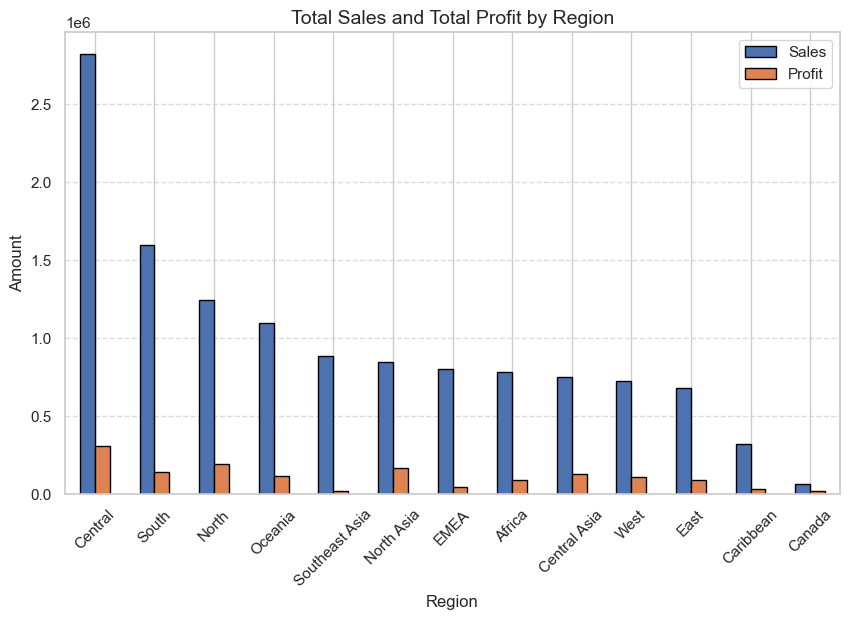

In [60]:
# Summarize total sales and total profit by region
region_summary = df.groupby('region')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)

# Plot
plt.figure(figsize=(10,6))
region_summary.plot(kind='bar', figsize=(10,6), edgecolor='black')
plt.title('Total Sales and Total Profit by Region', fontsize=14)
plt.ylabel('Amount', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Sales', 'Profit'])
plt.show()


In [62]:
# Total Sales
total_sales = df['sales'].sum()

# Total Profit
total_profit = df['profit'].sum()

# Average Order Value (AOV)
average_order_value = df.groupby('order_id')['sales'].sum().mean()

# Profit Margin (%)
profit_margin_percentage = (total_profit / total_sales) * 100

# Total Number of Orders
total_orders = df['order_id'].nunique()

# Print KPIs nicely
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Order Value: ${average_order_value:,.2f}")
print(f"Profit Margin: {profit_margin_percentage:.2f}%")
print(f"Total Number of Orders: {total_orders}")


Total Sales: $12,642,905.00
Total Profit: $1,467,457.29
Average Order Value: $505.01
Profit Margin: 11.61%
Total Number of Orders: 25035


In [64]:
# Create a summary DataFrame for KPIs
kpi_summary = pd.DataFrame({
    'Metric': ['Total Sales', 'Total Profit', 'Average Order Value', 'Profit Margin (%)', 'Total Number of Orders'],
    'Value': [
        f"${total_sales:,.2f}",
        f"${total_profit:,.2f}",
        f"${average_order_value:,.2f}",
        f"{profit_margin_percentage:.2f}%",
        total_orders
    ]
})

# Display it
kpi_summary


,Metric,Value
0,Total Sales,"$12,642,905.00"
1,Total Profit,"$1,467,457.29"
2,Average Order Value,$505.01
3,Profit Margin (%),11.61%
4,Total Number of Orders,25035


C:\Users\ahmad\AppData\Local\Temp\ipykernel_26116\106195146.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_r')


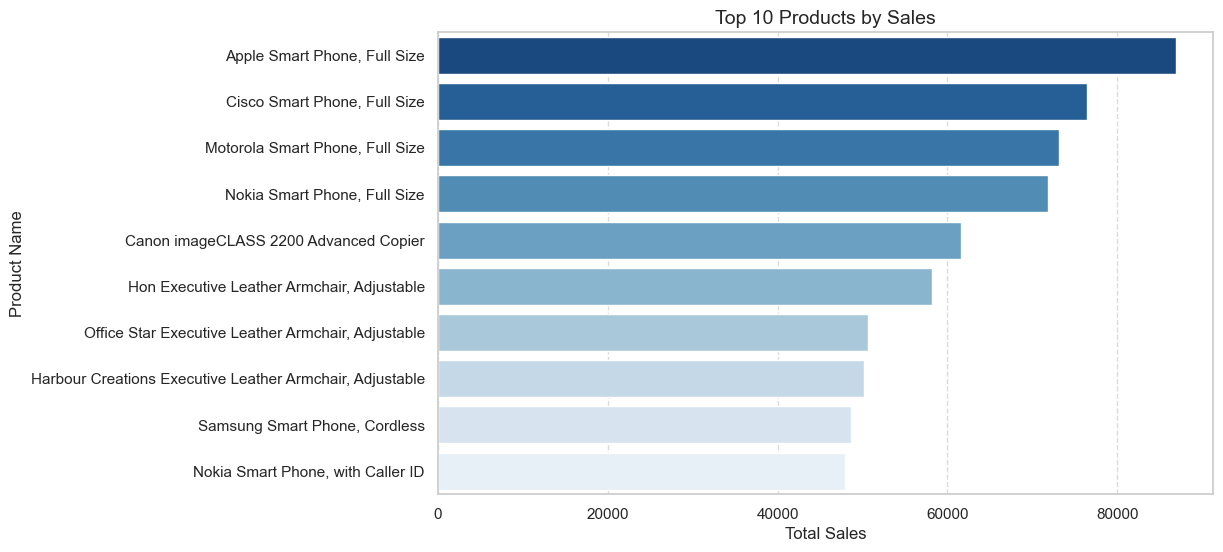

In [66]:
# Top 10 products by sales
top_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_r')
plt.title('Top 10 Products by Sales', fontsize=14)
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


C:\Users\ahmad\AppData\Local\Temp\ipykernel_26116\2698822197.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='Greens_r')


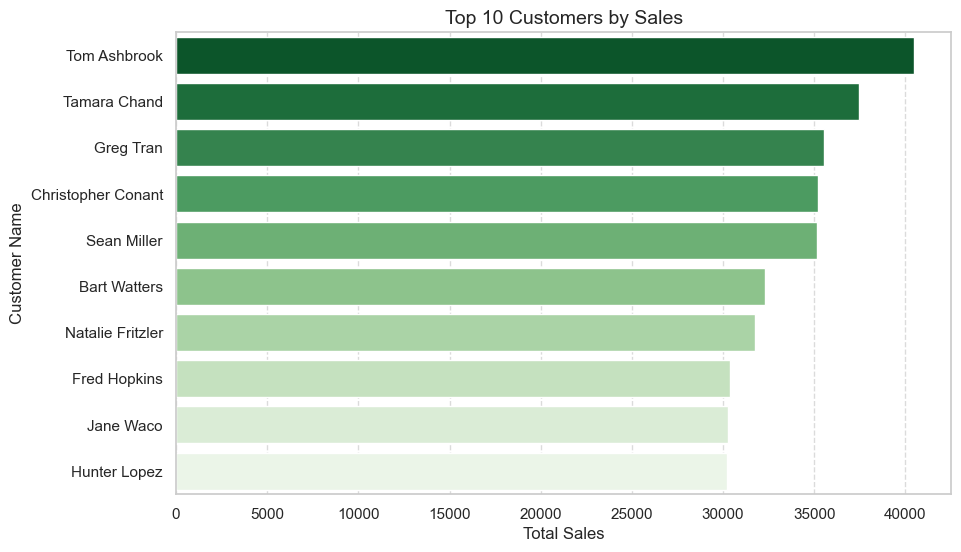

In [68]:
# Top 10 customers by sales
top_customers = df.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='Greens_r')
plt.title('Top 10 Customers by Sales', fontsize=14)
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


C:\Users\ahmad\AppData\Local\Temp\ipykernel_26116\1527155465.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='Purples_r')


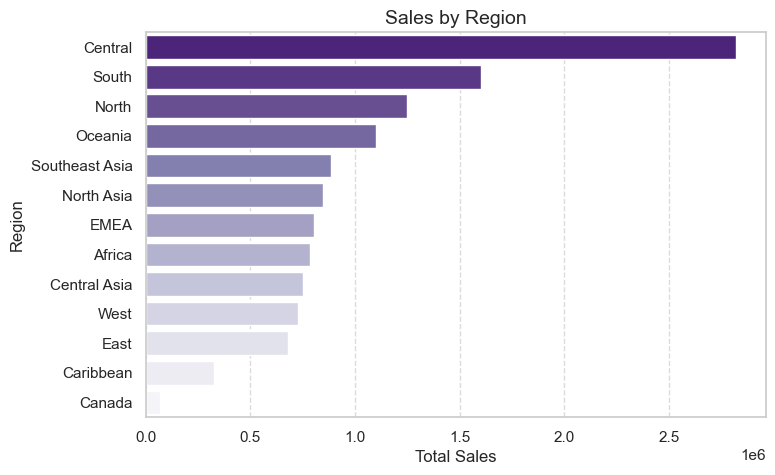

In [70]:
# Sales by region
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='Purples_r')
plt.title('Sales by Region', fontsize=14)
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
